# Importing some packages

In [96]:
import pandas as pd

from pathlib import Path
import os
from bisect import bisect

import seaborn as sns
import matplotlib.pyplot as plt

import re

import warnings
warnings.filterwarnings('ignore')

# Loading data

In [32]:
data_path = Path(r"C:/\Users/\vchar/\OneDrive/\Desktop/\ML Projects/\portfolio/\VehicleLoanDefault/\data")

train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
test_df = pd.read_csv(os.path.join(data_path, 'test.csv'))
info_df = pd.read_csv(os.path.join(data_path, 'data_dictionary.csv'))

# EDA

In [33]:
train_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [35]:
train_df.isnull().sum().sum()

7661

In [36]:
train_df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [37]:
test_df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [38]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             112392 non-null  int64  
 1   disbursed_amount                     112392 non-null  int64  
 2   asset_cost                           112392 non-null  int64  
 3   ltv                                  112392 non-null  float64
 4   branch_id                            112392 non-null  int64  
 5   supplier_id                          112392 non-null  int64  
 6   manufacturer_id                      112392 non-null  int64  
 7   Current_pincode_ID                   112392 non-null  int64  
 8   Date.of.Birth                        112392 non-null  object 
 9   Employment.Type                      108949 non-null  object 
 10  DisbursalDate                        112392 non-null  object 
 11  State_ID     

In [39]:
test_df.isnull().sum().sum()

3443

In [40]:
test_df.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [41]:
info_df

,Unnamed: 0,Variable Name,Description,Unnamed: 2
0,0,UniqueID,Identifier for customers,NaN
1,1,loan_default,Payment default in the first EMI on due date,NaN
2,2,disbursed_amount,Amount of Loan disbursed,NaN
3,3,asset_cost,Cost of the Asset,NaN
4,4,ltv,Loan to Value of the asset,NaN
5,5,branch_id,Branch where the loan was disbursed,NaN
6,6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,8,Current_pincode,Current pincode of the customer,NaN
9,9,Date.of.Birth,Date of birth of the customer,NaN


# Creating some new features

In [42]:
signs = [(1,20,"Cap"), (2,18,"Aqu"), (3,20,"Pis"), (4,20,"Ari"),
         (5,21,"Tau"), (6,21,"Gem"), (7,22,"Can"), (8,23,"Leo"),
         (9,23,"Vir"), (10,23,"Lib"), (11,22,"Sco"), (12,22,"Sag"),
         (12,31,"Cap")]

def zodiac_sign(m,d):
    return signs[bisect(signs,(m,d))][2]

train_df['DisbursalDate'] = pd.to_datetime(train_df['DisbursalDate'])#, format="%Y-%m-%d")
train_df['Date.of.Birth'] = pd.to_datetime(train_df['Date.of.Birth'])#, format="%Y-%m-%d")
train_df['age'] = round((train_df['DisbursalDate'] - train_df['Date.of.Birth']).dt.days / 365, 1)

train_df['disb_month'] = train_df['DisbursalDate'].dt.month
train_df['zodiac_sign'] = train_df['Date.of.Birth'].apply(lambda x: zodiac_sign(x.month, x.day))

def convert2numbers(x):
    derived_numbers = re.findall(r'(\d+)yrs (\d+)mon', x)
    return round(int(derived_numbers[0][0]) + int(derived_numbers[0][1]) / 12, 2)

train_df['avg_loan_tenure'] = train_df['AVERAGE.ACCT.AGE'].apply(convert2numbers)
train_df['hist_length'] = train_df['CREDIT.HISTORY.LENGTH'].apply(convert2numbers)

score_desc_list = list(train_df['PERFORM_CNS.SCORE.DESCRIPTION'].unique())
score_desc_map_dict = {score_desc_list[i]: i+1 for i in range(len(score_desc_list))}

train_df['score_desc'] = train_df['PERFORM_CNS.SCORE.DESCRIPTION'].map(score_desc_map_dict)

train_df.drop(
    columns=[
        'DisbursalDate', 'Date.of.Birth', 
        'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH',
        'PERFORM_CNS.SCORE.DESCRIPTION'
    ], 
    inplace=True
)

score_desc_map_dict

{'No Bureau History Available': 1,
 'I-Medium Risk': 2,
 'L-Very High Risk': 3,
 'A-Very Low Risk': 4,
 'Not Scored: Not Enough Info available on the customer': 5,
 'D-Very Low Risk': 6,
 'M-Very High Risk': 7,
 'B-Very Low Risk': 8,
 'C-Very Low Risk': 9,
 'E-Low Risk': 10,
 'H-Medium Risk': 11,
 'F-Low Risk': 12,
 'K-High Risk': 13,
 'Not Scored: No Activity seen on the customer (Inactive)': 14,
 'Not Scored: Sufficient History Not Available': 15,
 'Not Scored: No Updates available in last 36 months': 16,
 'G-Low Risk': 17,
 'J-High Risk': 18,
 'Not Scored: Only a Guarantor': 19,
 'Not Scored: More than 50 active Accounts found': 20}

In [43]:
test_df['DisbursalDate'] = pd.to_datetime(test_df['DisbursalDate'])#, format="%d-%m-%Y")
test_df['Date.of.Birth'] = pd.to_datetime(test_df['Date.of.Birth'])#, format="%d-%m-%Y")
test_df['age'] = round((test_df['DisbursalDate'] - test_df['Date.of.Birth']).dt.days / 365, 1)

test_df['disb_month'] = test_df['DisbursalDate'].dt.month
test_df['zodiac_sign'] = test_df['Date.of.Birth'].apply(lambda x: zodiac_sign(x.month, x.day))

test_df['avg_loan_tenure'] = test_df['AVERAGE.ACCT.AGE'].apply(convert2numbers)
test_df['hist_length'] = test_df['CREDIT.HISTORY.LENGTH'].apply(convert2numbers)

test_df['score_desc'] = test_df['PERFORM_CNS.SCORE.DESCRIPTION'].map(score_desc_map_dict)

test_df.drop(
    columns=[
        'DisbursalDate', 'Date.of.Birth', 
        'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH',
        'PERFORM_CNS.SCORE.DESCRIPTION'
    ], 
    inplace=True
)

# Getting categorical and numerical features

In [100]:
flag_columns = [col for col in train_df.columns if col.endswith('_flag') or col.endswith('_Flag')]

id_columns = [
    'branch_id', 'supplier_id', 'manufacturer_id', 
    'Current_pincode_ID', 'State_ID', 'Employee_code_ID'
]

categorical_features = list(train_df.select_dtypes(include=['object']).columns)
categorical_features.append('disb_month')
categorical_features.append('score_desc')
categorical_features.extend(flag_columns)
categorical_features.extend(id_columns)

ordinal_features = ['disb_month']
nominal_features = [col for col in categorical_features if col not in ordinal_features]
categorical_features

['Employment.Type',
 'zodiac_sign',
 'disb_month',
 'score_desc',
 'MobileNo_Avl_Flag',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'branch_id',
 'supplier_id',
 'manufacturer_id',
 'Current_pincode_ID',
 'State_ID',
 'Employee_code_ID']

In [84]:
numerical_features = list(train_df.select_dtypes(exclude=['object']).columns)
numerical_features.remove('loan_default')
numerical_features.remove('disb_month')
numerical_features.remove('score_desc')
numerical_features.remove('UniqueID')
for col in flag_columns:
    numerical_features.remove(col)
for col in id_columns:
    numerical_features.remove(col)
numerical_features

['disbursed_amount',
 'asset_cost',
 'ltv',
 'PERFORM_CNS.SCORE',
 'PRI.NO.OF.ACCTS',
 'PRI.ACTIVE.ACCTS',
 'PRI.OVERDUE.ACCTS',
 'PRI.CURRENT.BALANCE',
 'PRI.SANCTIONED.AMOUNT',
 'PRI.DISBURSED.AMOUNT',
 'SEC.NO.OF.ACCTS',
 'SEC.ACTIVE.ACCTS',
 'SEC.OVERDUE.ACCTS',
 'SEC.CURRENT.BALANCE',
 'SEC.SANCTIONED.AMOUNT',
 'SEC.DISBURSED.AMOUNT',
 'PRIMARY.INSTAL.AMT',
 'SEC.INSTAL.AMT',
 'NEW.ACCTS.IN.LAST.SIX.MONTHS',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'age',
 'avg_loan_tenure',
 'hist_length']

# Univariate Analysis

## Categorical features

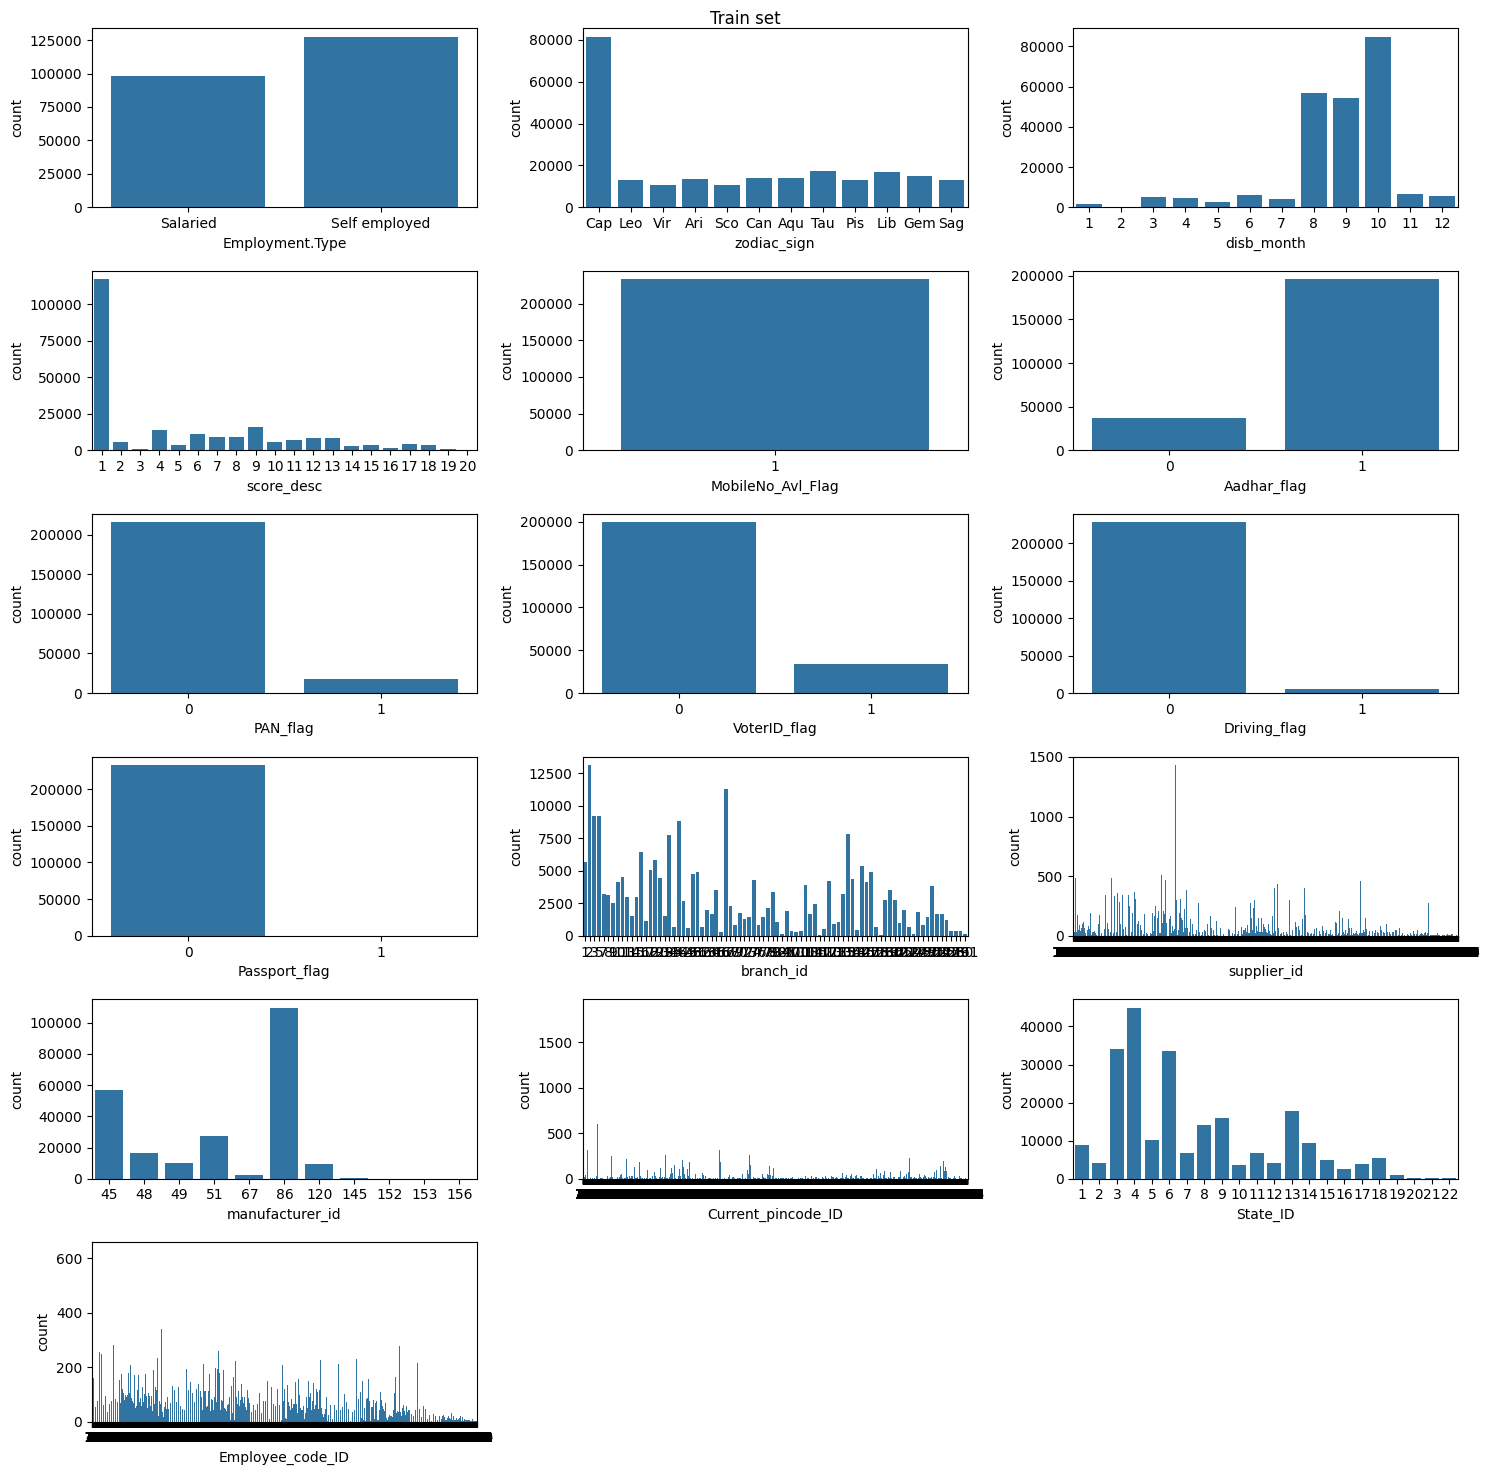

In [91]:
selected_ncols = 3

selected_nrows = int((len(categorical_features) - len(categorical_features) % selected_ncols) / selected_ncols)
if len(categorical_features) % selected_ncols != 0:
    selected_nrows += 1

fig = plt.figure(figsize=(15, 15))
for feat in categorical_features:
    plt.subplot(selected_nrows, selected_ncols, categorical_features.index(feat)+1)
    sns.countplot(x=feat, data=train_df)
    # plt.title(feat)
    # plt.xticks(rotation=90)
plt.suptitle('Train set')
plt.tight_layout()

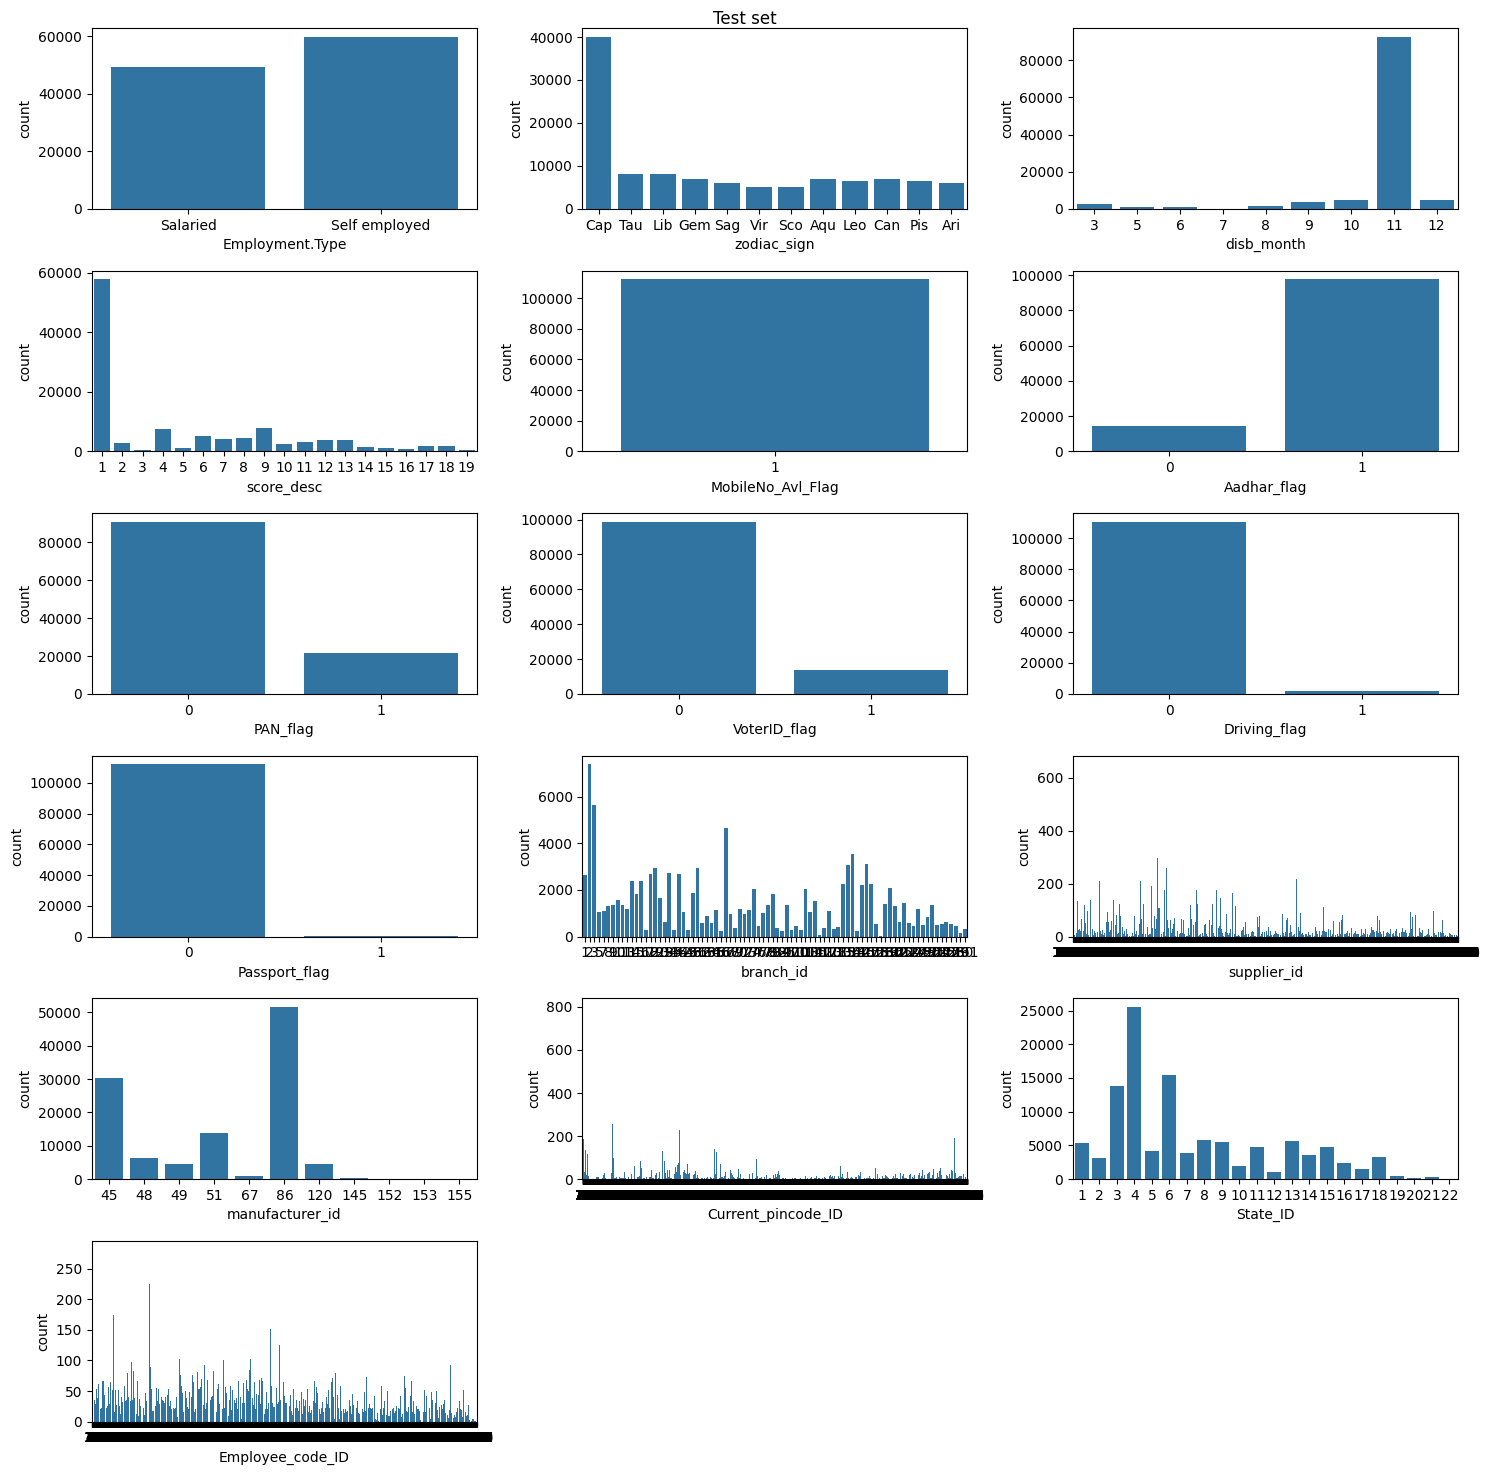

In [92]:
selected_ncols = 3

selected_nrows = int((len(categorical_features) - len(categorical_features) % selected_ncols) / selected_ncols)
if len(categorical_features) % selected_ncols != 0:
    selected_nrows += 1

fig = plt.figure(figsize=(15, 15))
for feat in categorical_features:
    plt.subplot(selected_nrows, selected_ncols, categorical_features.index(feat)+1)
    sns.countplot(x=feat, data=test_df)
    # plt.title(feat)
    # plt.xticks(rotation=90)
plt.suptitle('Test set')
plt.tight_layout()

## Numerical features

In [93]:
train_df[numerical_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
PERFORM_CNS.SCORE,233154.0,289.462994,3.383748e+02,0.00,0.00,0.0,678.00,8.900000e+02
PRI.NO.OF.ACCTS,233154.0,2.440636,5.217233e+00,0.00,0.00,0.0,3.00,4.530000e+02
PRI.ACTIVE.ACCTS,233154.0,1.039896,1.941496e+00,0.00,0.00,0.0,1.00,1.440000e+02
PRI.OVERDUE.ACCTS,233154.0,0.156549,5.487867e-01,0.00,0.00,0.0,0.00,2.500000e+01
PRI.CURRENT.BALANCE,233154.0,165900.076936,9.422736e+05,-6678296.00,0.00,0.0,35006.50,9.652492e+07
PRI.SANCTIONED.AMOUNT,233154.0,218503.855323,2.374794e+06,0.00,0.00,0.0,62500.00,1.000000e+09
PRI.DISBURSED.AMOUNT,233154.0,218065.898655,2.377744e+06,0.00,0.00,0.0,60800.00,1.000000e+09


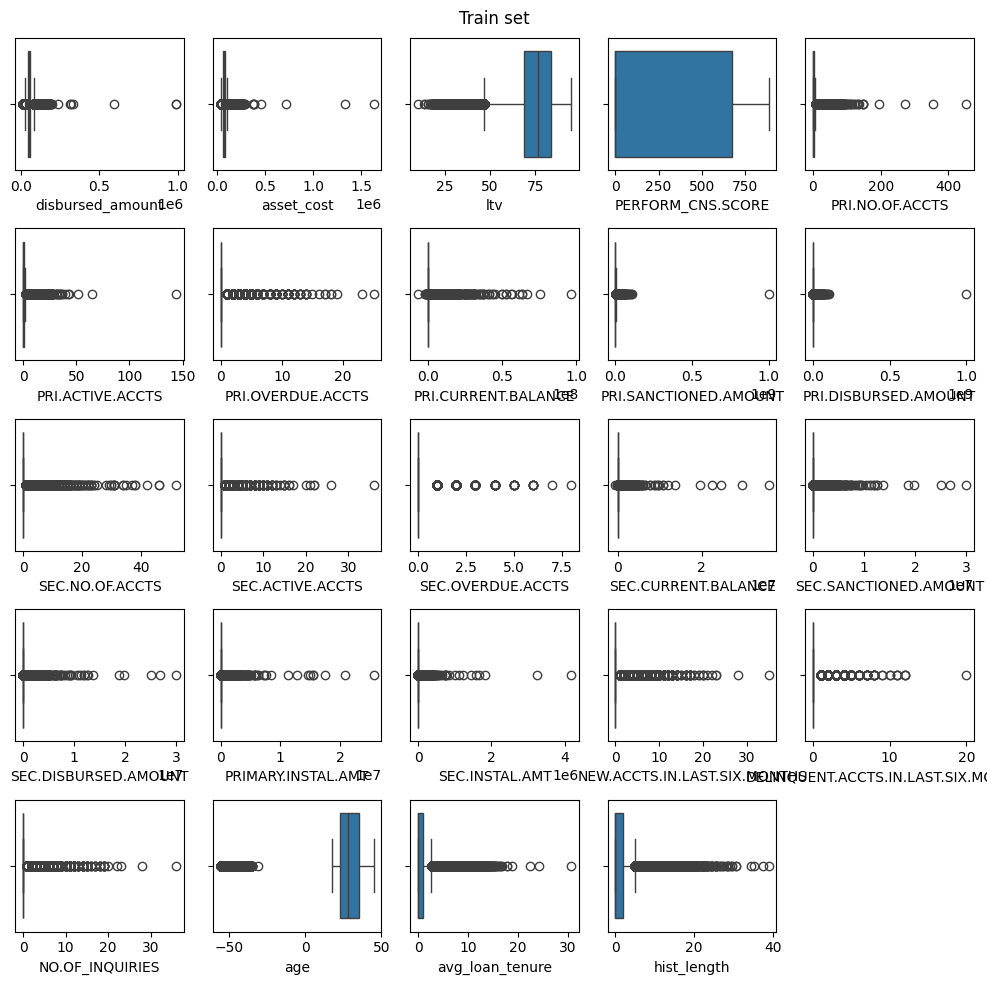

In [94]:
selected_ncols = 5

selected_nrows = int((len(numerical_features) - len(numerical_features) % selected_ncols) / selected_ncols)
if len(numerical_features) % selected_ncols != 0:
    selected_nrows += 1

fig = plt.figure(figsize=(10, 10))
for feat in numerical_features:
    plt.subplot(selected_nrows, selected_ncols, numerical_features.index(feat)+1)
    sns.boxplot(x=feat, data=train_df)
    # plt.title(feat)
plt.suptitle('Train set')
plt.tight_layout()

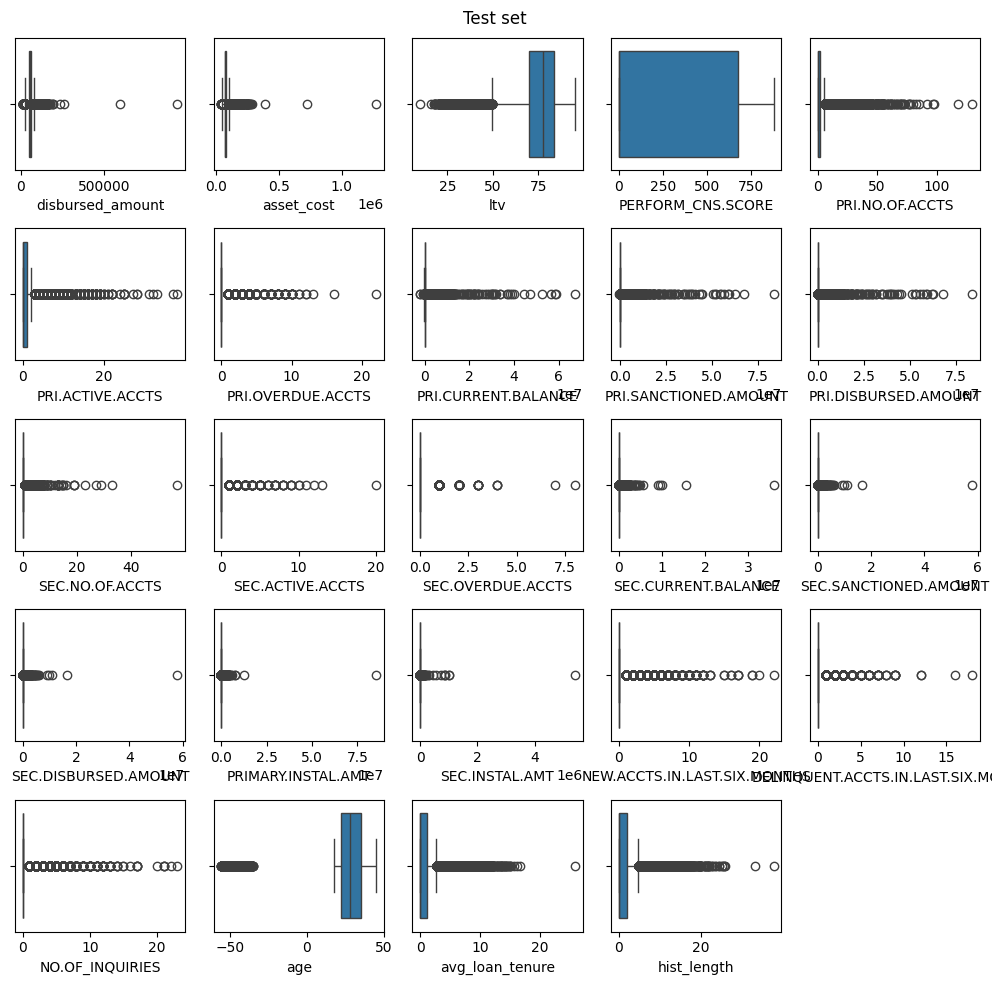

In [95]:
selected_ncols = 5

selected_nrows = int((len(numerical_features) - len(numerical_features) % selected_ncols) / selected_ncols)
if len(numerical_features) % selected_ncols != 0:
    selected_nrows += 1

fig = plt.figure(figsize=(10, 10))
for feat in numerical_features:
    plt.subplot(selected_nrows, selected_ncols, numerical_features.index(feat)+1)
    sns.boxplot(x=feat, data=test_df)
    # plt.title(feat)
plt.suptitle('Test set')
plt.tight_layout()

## Target

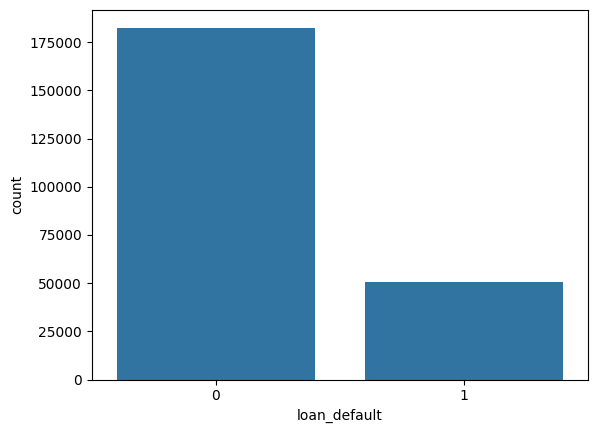

In [101]:
sns.countplot(x='loan_default', data=train_df);

In [102]:
train_df['loan_default'].value_counts(normalize=True)

loan_default
0    0.782929
1    0.217071
Name: proportion, dtype: float64

# Bivariate analysis

## Target vs categorical

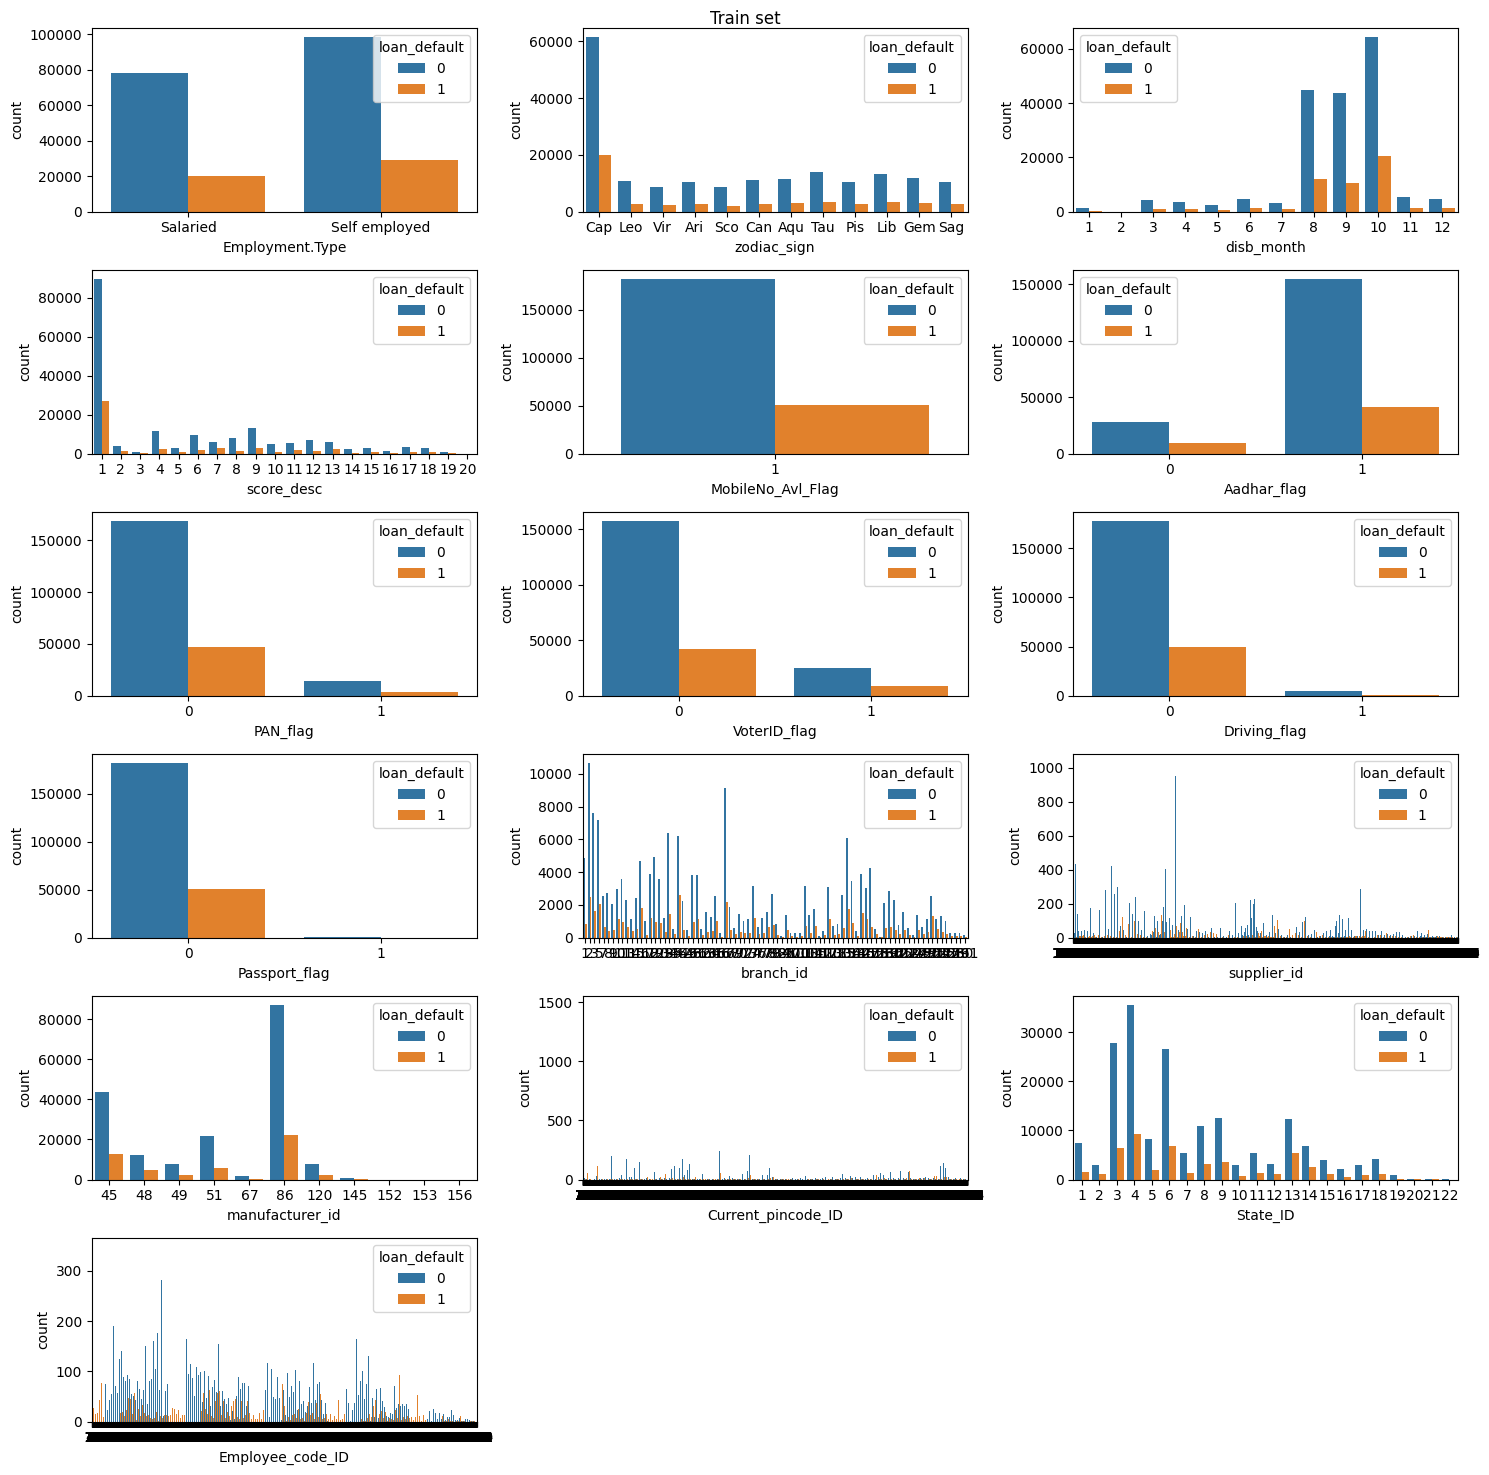

In [103]:
selected_ncols = 3

selected_nrows = int((len(categorical_features) - len(categorical_features) % selected_ncols) / selected_ncols)
if len(categorical_features) % selected_ncols != 0:
    selected_nrows += 1

fig = plt.figure(figsize=(15, 15))
for feat in categorical_features:
    plt.subplot(selected_nrows, selected_ncols, categorical_features.index(feat)+1)
    sns.countplot(x=feat, data=train_df, hue='loan_default')
    # plt.title(feat)
    # plt.xticks(rotation=90)
plt.suptitle('Train set')
plt.tight_layout()

## Target vs numeric

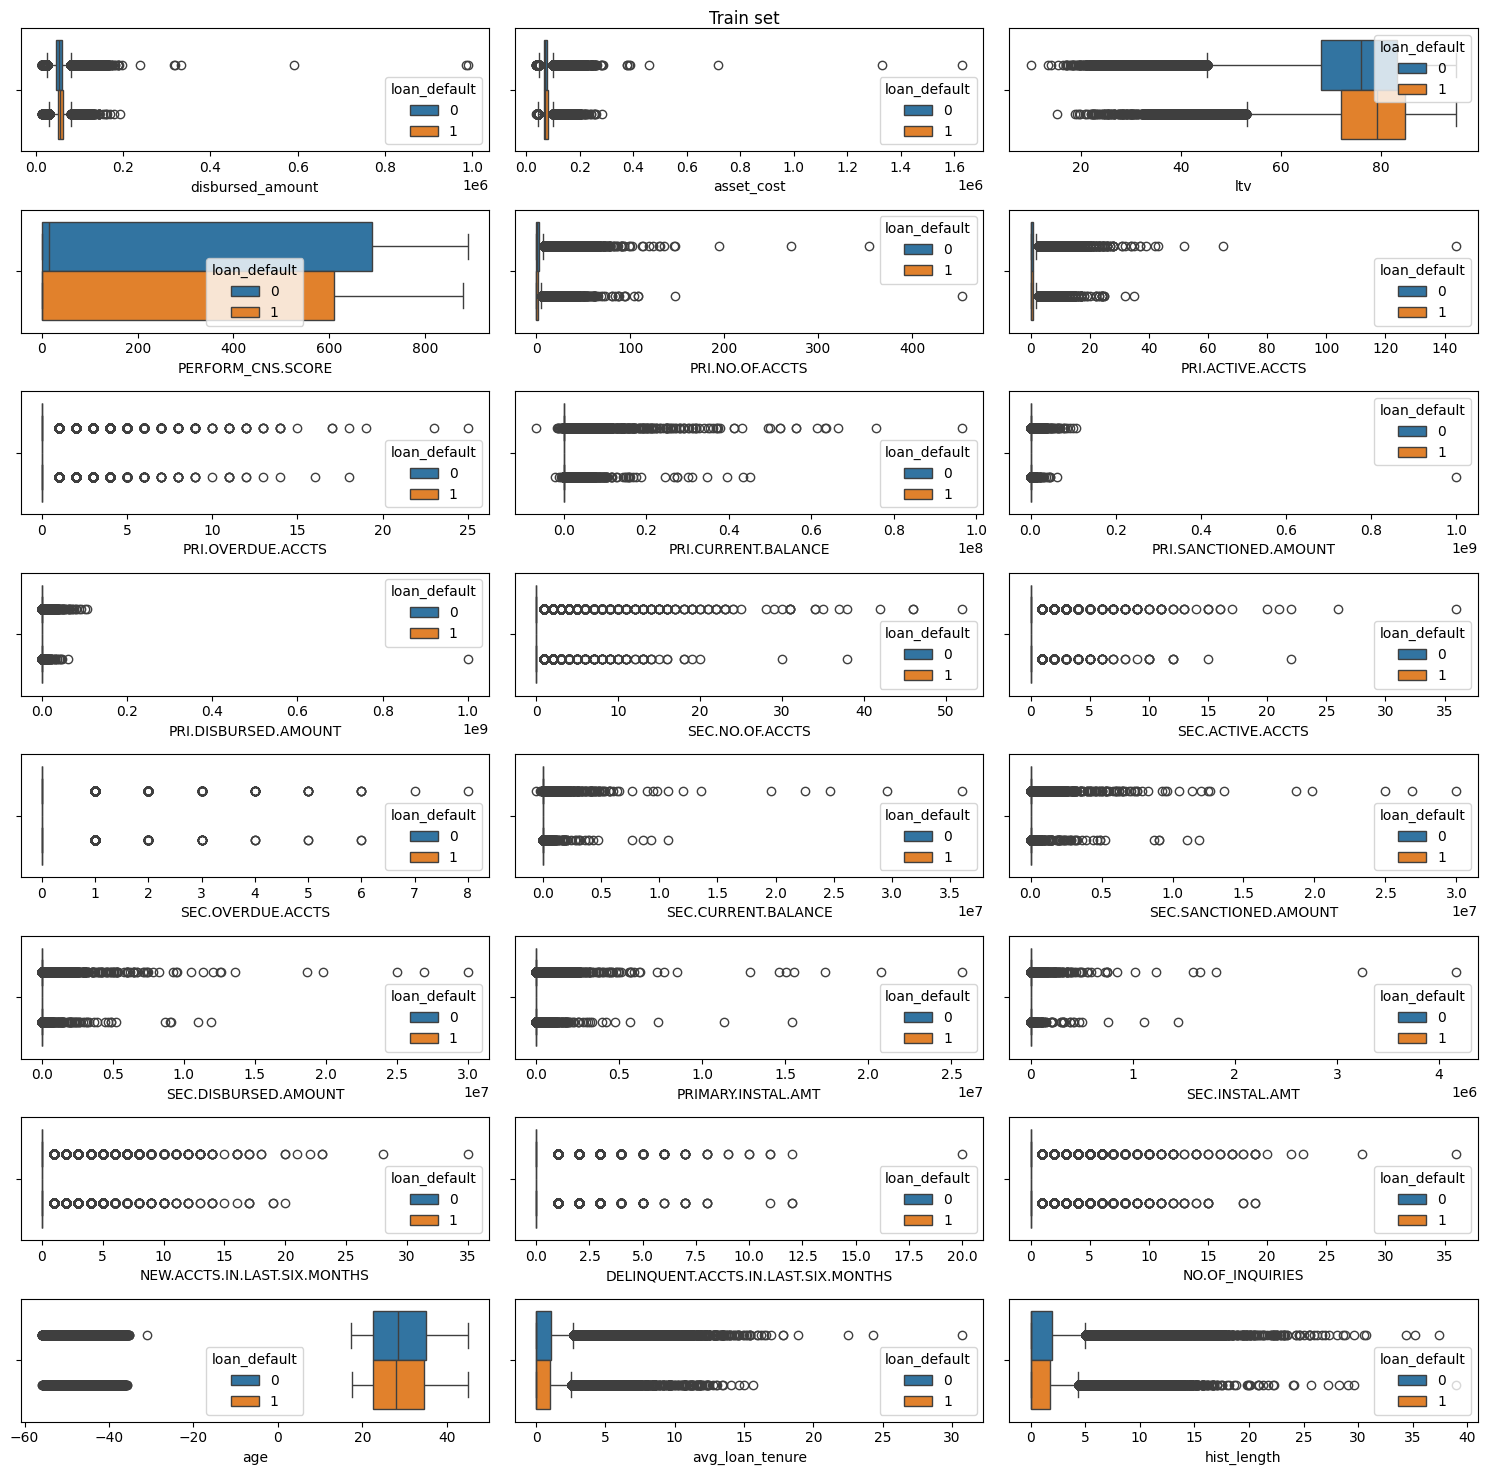

In [105]:
selected_ncols = 3

selected_nrows = int((len(numerical_features) - len(numerical_features) % selected_ncols) / selected_ncols)
if len(numerical_features) % selected_ncols != 0:
    selected_nrows += 1

fig = plt.figure(figsize=(15, 15))
for feat in numerical_features:
    plt.subplot(selected_nrows, selected_ncols, numerical_features.index(feat)+1)
    sns.boxplot(x=feat, data=train_df, hue='loan_default')
    # plt.title(feat)
    # plt.xticks(rotation=90)
plt.suptitle('Train set')
plt.tight_layout()